In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

Import movies and ratings and pick only the necessary columns from each. 
Merge both the csv into one dataset.

In [110]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [111]:
movie_data = pd.merge(rating_df,movies_df,on='movieId')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
 3   title    100836 non-null  object 
dtypes: float32(1), int32(2), object(1)
memory usage: 2.7+ MB


In [112]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [113]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   object
dtypes: int32(1), object(1)
memory usage: 114.3+ KB


In [114]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.000
1,1,3,4.000
2,1,6,4.000
3,1,47,5.000
4,1,50,5.000


In [115]:
movie_data = pd.merge(rating_df,movies_df,on='movieId')
movie_data.head()

,userId,movieId,rating,title
0,1,1,4.000,Toy Story (1995)
1,5,1,4.000,Toy Story (1995)
2,7,1,4.500,Toy Story (1995)
3,15,1,2.500,Toy Story (1995)
4,17,1,4.500,Toy Story (1995)


In [116]:
movie_data.tail()

,userId,movieId,rating,title
100831,610,160341,2.500,Bloodmoon (1997)
100832,610,160527,4.500,Sympathy for the Underdog (1971)
100833,610,160836,3.000,Hazard (2005)
100834,610,163937,3.500,Blair Witch (2016)
100835,610,163981,3.500,31 (2016)


In [117]:
movie_data.rename(columns={"rating": "user_rating"},  inplace=True)

Check for Missing Values

In [118]:
movie_data.isna().sum()

userId         0
movieId        0
user_rating    0
title          0
dtype: int64

In [119]:
#combine_movie_rating = movie_data.dropna(axis=0, subset=['title'])

1. Group by title and ratings to obtain total rating count
2. Reset the index to avoid title be taken as index.
3. Rename the user_rating column to totalRatingCount

In [120]:
combine_movie_rating = movie_data.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['user_rating'].count().reset_index().
     rename(columns = {'user_rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


Merge totalRatingCount together with  combine_movie_rating

In [121]:
rating_with_totalRatingCount = combine_movie_rating.merge(
movie_ratingCount, left_on='title', right_on='title',
how='left')
rating_with_totalRatingCount.head()

,userId,movieId,user_rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


# EDA

Text(0.5, 1.0, 'Rating Distribution')

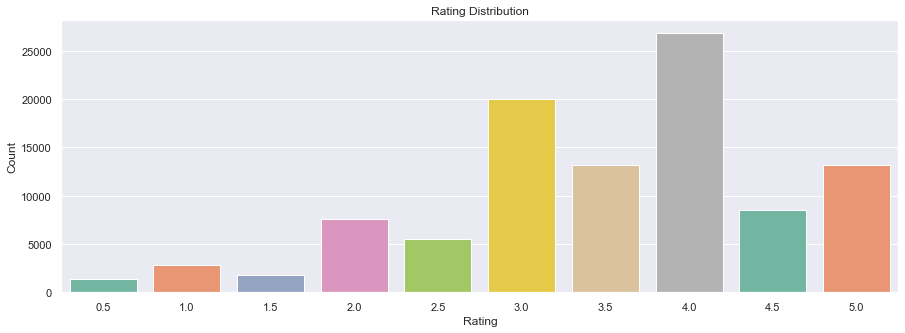

In [122]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(x='user_rating', data=rating_with_totalRatingCount, palette="Set2")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")

In [123]:
# Calculate count rating of all movies 
rating_with_totalRatingCount.groupby('title')['user_rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: user_rating, dtype: int64

In [124]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


Check a random user's ratings

In [125]:
rating_with_totalRatingCount[rating_with_totalRatingCount['userId'] == 10]

,userId,movieId,user_rating,title,totalRatingCount
1824,10,296,1.000,Pulp Fiction (1994),307
2430,10,356,3.500,Forrest Gump (1994),329
12644,10,2571,0.500,"Matrix, The (1999)",278
13852,10,2858,1.000,American Beauty (1999),204
14325,10,2959,0.500,Fight Club (1999),218
...,...,...,...,...,...
43375,10,119145,1.000,Kingsman: The Secret Service (2015),36
43411,10,129428,3.500,The Second Best Exotic Marigold Hotel (2015),2
43413,10,136020,5.000,Spectre (2015),17
43430,10,137595,4.000,Magic Mike XXL (2015),1


Only consider movies with specified popularity threshold 

Text(0, 0.5, 'Count')

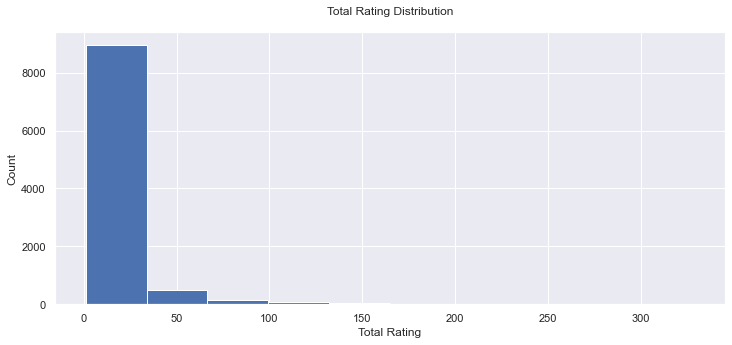

In [126]:
plt.figure(figsize=(12,5))
movie_ratingCount['totalRatingCount'].plot.hist(bins=10)
plt.title('Total Rating Distribution\n')
plt.xlabel('Total Rating')
plt.ylabel('Count')

In [127]:
popularity_threshold=70
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,user_rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [128]:
pop=rating_popular_movie.sort_values('totalRatingCount', ascending=False).drop_duplicates(subset=['title'])
#pop

Text(0.5, 1.0, 'Popular Movies')

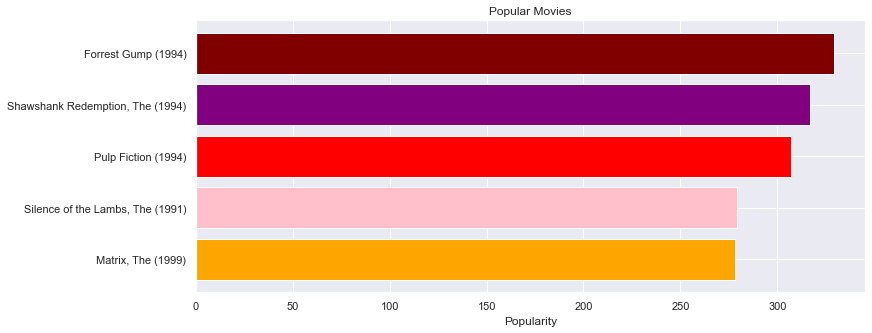

In [129]:
plt.figure(figsize=(12,5))
plt.barh(pop['title'].head(), pop['totalRatingCount'].head(),align='center', color=['maroon', 'purple', 'red', 'pink','orange'])
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Transform the dataset into pivot table

In [130]:
#create pivot table
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='user_rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
"40-Year-Old Virgin, The (2005)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.500
Ace Ventura: Pet Detective (1994),0.000,0.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,...,0.000,2.000,0.000,2.000,0.000,0.000,0.000,3.500,0.000,3.000
Ace Ventura: When Nature Calls (1995),0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,...,0.000,2.000,0.000,1.000,0.000,2.000,0.000,2.000,0.000,0.000


# Modeling

In [131]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [132]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [133]:
movie_features_df.shape

(259, 602)

# Results

In [134]:
movie_features_df.index = movie_features_df.index.str.upper()
movie_features_df.index.tolist()

['2001: A SPACE ODYSSEY (1968)',
 '300 (2007)',
 '40-YEAR-OLD VIRGIN, THE (2005)',
 'ACE VENTURA: PET DETECTIVE (1994)',
 'ACE VENTURA: WHEN NATURE CALLS (1995)',
 'ADDAMS FAMILY VALUES (1993)',
 'AIRPLANE! (1980)',
 'ALADDIN (1992)',
 'ALIEN (1979)',
 'ALIENS (1986)',
 'ALMOST FAMOUS (2000)',
 'AMADEUS (1984)',
 "AMELIE (FABULEUX DESTIN D'AMÉLIE POULAIN, LE) (2001)",
 'AMERICAN BEAUTY (1999)',
 'AMERICAN HISTORY X (1998)',
 'AMERICAN PIE (1999)',
 'AMERICAN PRESIDENT, THE (1995)',
 'APOCALYPSE NOW (1979)',
 'APOLLO 13 (1995)',
 'ARMAGEDDON (1998)',
 'AS GOOD AS IT GETS (1997)',
 'AUSTIN POWERS: INTERNATIONAL MAN OF MYSTERY (1997)',
 'AUSTIN POWERS: THE SPY WHO SHAGGED ME (1999)',
 'AVATAR (2009)',
 'BABE (1995)',
 'BACK TO THE FUTURE (1985)',
 'BACK TO THE FUTURE PART II (1989)',
 'BACK TO THE FUTURE PART III (1990)',
 'BATMAN (1989)',
 'BATMAN BEGINS (2005)',
 'BATMAN FOREVER (1995)',
 'BEAUTIFUL MIND, A (2001)',
 'BEAUTY AND THE BEAST (1991)',
 'BEETLEJUICE (1988)',
 'BEING JOHN MAL

In [135]:
# Taking input from the user
movie_name = input("Enter movie: ").upper()

#remove duplicates
movies_nodup = rating_popular_movie['title'].drop_duplicates()

string_list = movies_nodup.tolist()
for i in range(len(string_list)):
    string_list[i] = string_list[i].upper()


movie_exist = False 
i = 0
while i < len(movies_nodup):
        if movie_name == string_list[i]:
            movie_exist = True
            break
        else:
            movie_exist = False 
            pass
        i += 1


if movie_exist:
    movie_index = movie_features_df[movie_features_df.index == movie_name].index
    distances, indices = model_knn.kneighbors(movie_features_df.loc[movie_index,:].values.reshape(1, -1), n_neighbors = 16)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Because You Liked {0}:\n'.format(movie_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
else:
    print('Movie not found in database')

Enter movie: Up (2009)
Because You Liked UP (2009):

1: WALL·E (2008), with distance of 0.3106173872947693:
2: AVATAR (2009), with distance of 0.3654446005821228:
3: INCEPTION (2010), with distance of 0.39382660388946533:
4: IRON MAN (2008), with distance of 0.40326452255249023:
5: DARK KNIGHT, THE (2008), with distance of 0.41614770889282227:
6: DARK KNIGHT RISES, THE (2012), with distance of 0.46289265155792236:
7: HANGOVER, THE (2009), with distance of 0.4699860215187073:
8: INTERSTELLAR (2014), with distance of 0.47239309549331665:
9: DJANGO UNCHAINED (2012), with distance of 0.4896072745323181:
10: LORD OF THE RINGS: THE RETURN OF THE KING, THE (2003), with distance of 0.49069786071777344:
11: HARRY POTTER AND THE PRISONER OF AZKABAN (2004), with distance of 0.49753451347351074:
12: V FOR VENDETTA (2006), with distance of 0.5015044212341309:
13: FINDING NEMO (2003), with distance of 0.5024831891059875:
14: INCREDIBLES, THE (2004), with distance of 0.50254225730896:
15: LORD OF THE

# Content Filtering - Sigmoid Kernel

In [137]:
# read csv
movies_df = pd.read_csv('movies.csv')
rating_df=pd.read_csv('ratings.csv')
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.000,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.500,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.500,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.500,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [138]:
# remove duplicated rows
df.drop_duplicates(subset=['title'],keep='first',inplace=True)
df = df.reset_index()
df['rowNumber'] = np.arange(len(df))

In [139]:
# create a function to combine the values of the important columns into a single string
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
        important_features.append(data['genres'].iloc[i]+' '+
                                  str(data['rating'].iloc[i])
                                 )
    return important_features

In [140]:
# create a column to hold the combined strings
df['important_features'] = get_important_features(df)

# show the data
df.head(2)

,index,userId,movieId,rating,timestamp,title,genres,rowNumber,important_features
0,0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Adventure|Animation|Children|Comedy|Fantasy 4.0
1,215,1,3,4.000,964981247,Grumpier Old Men (1995),Comedy|Romance,1,Comedy|Romance 4.0


### Convert dataset to matrix of TF-IDF features

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()

#fitting tf-idf on dataset
tfv_matrix = tfv.fit_transform(df['important_features'])

In [142]:
print(tfv_matrix.shape)

(9719, 24)


### Transform the values between 0 to 1 with Sigmoid Kernel

In [143]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [144]:
sig[0]

array([0.77854536, 0.76425141, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

### Mapping of indices and movie title

In [145]:
indices=pd.Series(df.index,index=df['title']).drop_duplicates()
indices

title
Toy Story (1995)                       0
Grumpier Old Men (1995)                1
Heat (1995)                            2
Seven (a.k.a. Se7en) (1995)            3
Usual Suspects, The (1995)             4
                                    ... 
Bloodmoon (1997)                    9714
Sympathy for the Underdog (1971)    9715
Hazard (2005)                       9716
Blair Witch (2016)                  9717
31 (2016)                           9718
Length: 9719, dtype: int64

In [146]:
df['title'].tolist()

['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'From Dusk Till Dawn (1996)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Rob Roy (1995)',
 'Canadian Bacon (1995)',
 'Desperado (1995)',
 'Billy Madison (1995)',
 'Clerks (1994)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Ed Wood (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Pulp Fiction (1994)',
 'Stargate (1994)',
 'Tommy Boy (1995)',
 'Clear and Present Danger (1994)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'Mask, The (1994)',
 'Blown Away (1994)',
 'Dazed and Confused (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Mrs. Doubtfire (1993)',
 "Schindler's List (1993)",
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Tombstone (1993)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)',
 'Fargo (1996)',
 'Mission: Impossible (1996)',

In [147]:
def rec(title,sig=sig):
    
    idx=indices[title]
    
    sig_scores=list(enumerate(sig[idx]))
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    sig_scores = sig_scores[1:11]
    
    
    movie_indices = [i[0] for i in sig_scores]
    return df['title'].iloc[movie_indices]

In [149]:
rec('Spider-Man 2 (2004)')

782                            Spider-Man 2 (2004)
820                        Superman Returns (2006)
926                                  Avatar (2009)
948                 Amazing Spider-Man, The (2012)
1066                          Avengers, The (2012)
1070                               Oblivion (2013)
1074    Captain America: The Winter Soldier (2014)
1151                              Star Trek (2009)
1346                Star Trek Into Darkness (2013)
1353        The Hunger Games: Catching Fire (2013)
Name: title, dtype: object